# SVM
Para este ejemplo de implementación de SVM vamos a seguir usando el dataset de Iris. Esta vez, vamos a usar por eso un .csv, formato muy habitual de carga de datos para ML. Podeis encontrar el dataset en kaggle en esta URL: https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset/data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

Vamos ahora a cargar los datos 

In [4]:
df = pd.read_csv('iris.csv')
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])

Veamos a ver que tipos de datos tenemos, que ya sabemos pero hagamos lo de la misma forma.

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Como siempre, vamos a ver que forma tienen los datos (Cogemos solo 2 de las variables):

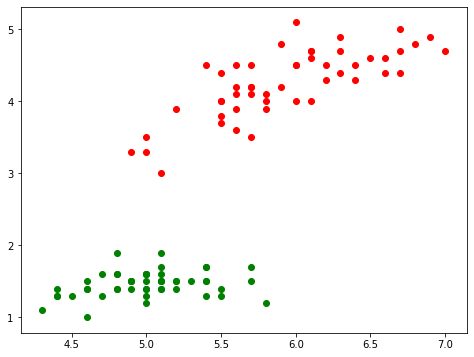

In [6]:
x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,color='green')
plt.scatter(versicolor_x,versicolor_y,color='red')
plt.show()

Nos vamos a *cargar* los valores que no queremos del dataset, y nos vamos a quedar solo con la anchura del petalo y la longitud del palo(??). Nos vamos tambien a crear ya los datasets de entreno y testeo, usando un split esta vez de 90% para training y 10% para test.

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df = df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()
## Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

Vamos ahora a implementar el algoritmo de entreno que hemos visto en el PPTX:

In [18]:
train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001
# The regularizacion parameter is 1/epochs

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    
    if (epochs == 1):
        print("Epochs={} and Cost={}".format(epochs,cost))
    if (epochs%100 == 0):
        print("Epochs={} and Cost={}".format(epochs,cost))
        
    epochs += 1

Epochs=1 and Cost=[1.]
Epochs=100 and Cost=[0.11975791]
Epochs=200 and Cost=0
Epochs=300 and Cost=0
Epochs=400 and Cost=0
Epochs=500 and Cost=0
Epochs=600 and Cost=0
Epochs=700 and Cost=0
Epochs=800 and Cost=0
Epochs=900 and Cost=0
Epochs=1000 and Cost=0
Epochs=1100 and Cost=0
Epochs=1200 and Cost=0
Epochs=1300 and Cost=0
Epochs=1400 and Cost=0
Epochs=1500 and Cost=0
Epochs=1600 and Cost=0
Epochs=1700 and Cost=0
Epochs=1800 and Cost=0
Epochs=1900 and Cost=0
Epochs=2000 and Cost=0
Epochs=2100 and Cost=0
Epochs=2200 and Cost=0
Epochs=2300 and Cost=0
Epochs=2400 and Cost=0
Epochs=2500 and Cost=0
Epochs=2600 and Cost=0
Epochs=2700 and Cost=0
Epochs=2800 and Cost=0
Epochs=2900 and Cost=0
Epochs=3000 and Cost=0
Epochs=3100 and Cost=0
Epochs=3200 and Cost=0
Epochs=3300 and Cost=0
Epochs=3400 and Cost=0
Epochs=3500 and Cost=0
Epochs=3600 and Cost=0
Epochs=3700 and Cost=0
Epochs=3800 and Cost=0
Epochs=3900 and Cost=0
Epochs=4000 and Cost=0
Epochs=4100 and Cost=0
Epochs=4200 and Cost=0
Epochs=43

Vamos a ver ahora, que ya hemos entrenado el modelo, como se comporta la solución que hemos encontrado:

In [21]:
# Nos quedamos con los 10 puntos de test
index = list(range(10,90))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)

# Extraemos las features
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)

# Realizamos la predicción.
y_pred = w1 * test_f1 + w2 * test_f2
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print("La accuracy que tenemos es de: {}".format(accuracy_score(y_test,predictions)))

La accuracy que tenemos es de: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  after removing the cwd from sys.path.
